# DATASCI Final Project Title

Group: Baby Alive!

Members:
    Benedictos,
    Loquinte,
    Marasigan,
    Masilang,
    Tejada

In [25]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore
from sklearn.feature_extraction.text import CountVectorizer

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Musixmatch API Library

- describe API Library

### Azapi

Azapi is an API by Khaled ElMorshedy (https://github.com/elmoiv) for AZLyrics.com to get the lyrics of a song. This will be used by the researchers to collect the complete lyrics of the songs the researchers got from the Musixmatch API. Azapi can be accessed through the link https://github.com/elmoiv/azapi

In [3]:
#code here

### Research Objectives

In [4]:
#code here

### Scopes and Limitations

In [5]:
#code here

---

## Data Preparation

In [6]:
# code here

### Get sets of genres (Musix) 

In [7]:
# code here

### Get list of Filipino songs filtered by genres 
Year: 2011-2020

In [8]:
# code here

### Generate `.csv` files
(1 malaking DataFrame -> 1 DataFrame = 1 genre

In [9]:
# code here

### Get lyrics of each song via lyrics_id

In [10]:
# code here

### Load files

The files to be used for this study are the following:
- `all_music.csv`
- `alternative_music.csv`
- `christian_music.csv`
- `hiphop_music.csv`
- `pop_music.csv`
- `rbSoul_music.csv`
- `rock_music.csv`

In [9]:
df = pd.read_csv('CSV Files/all_music.csv')
df_alt = pd.read_csv('CSV Files/alternative_music.csv')
df_chr = pd.read_csv('CSV Files/christian_music.csv')
df_hphp = pd.read_csv('CSV Files/hiphop_music.csv')
df_pop = pd.read_csv('CSV Files/pop_music.csv')
df_rb = pd.read_csv('CSV Files/rbSoul_music.csv')
df_rck = pd.read_csv('CSV Files/rock_music.csv')

---

## Initial Exploratory Data Analysis

In [20]:
df

,Unnamed: 0,track_id,track_name,artist_name,genre_id,genre_names,lyrics
0,0,163709256,Ikaw At Ako,Moira Dela Torre feat. Jason Marvin,['14'],['Pop'],Sabi nila\nBalang araw darating\nAng i'yong ta...
1,1,167116583,Hanggang Dito Na Lang,Jaya,['14'],['Pop'],'Di ko alam kung tama ba ito\nLilisan ako upan...
2,2,114473971,Ikaw,Yeng Constantino,['14'],['Pop'],Sa pagpatak ng bawat oras ay ikaw\nAng iniisip...
3,3,114797567,Chinito,Yeng Constantino,['14'],['Pop'],Napapansin mo ba\nKaya ang tulad ko\nKahit nas...
4,4,170308366,"Ba'T Gano'N? (Theme From the Movie ""Family His...",Miguel Tanfelix feat. Mikoy Morales & Jemwell ...,"['34', '14']","['Music', 'Pop']",NaN
...,...,...,...,...,...,...,...
1195,1195,74789949,Bakit Kailangan Mag-Pray?,Musikatha Kids,['22'],['Christian & Gospel'],NaN
1196,1196,200856862,Tagpuan,Jay Tolentino,"['14', '22']","['Pop', 'Christian & Gospel']",NaN
1197,1197,79505192,Tayo's Sumamba,Tony Rodeo,['22'],['Christian & Gospel'],NaN
1198,1198,131978085,Biyayang Ganap,Faithmusic Manila,['22'],['Christian & Gospel'],NaN


### Number of songs per genre

First we look into the composition of the dataset in terms of genres. For this part, we need not...

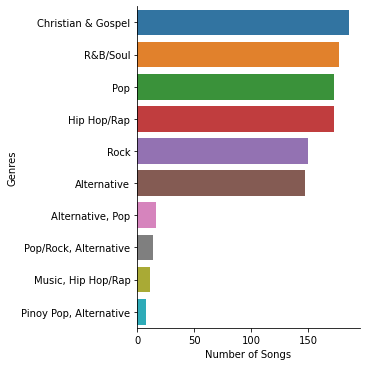

In [23]:
primary_genres = df["genre_names"].value_counts().rename_axis('Genres').reset_index(name='Number of Songs')
primary_genres = primary_genres.nlargest(10, 'Number of Songs')
primary_genres["Genres"] = primary_genres["Genres"].str.replace('[\[\]\']', '', regex=True) #remove brackets and quotes 

primary_genres_plot = sns.catplot(y="Genres", x="Number of Songs", kind="bar", data=primary_genres)

### Frequent Artists

In [13]:
# code here

### Word Counts (Top N words)

Next, we count the frequency of each word in the corpus of lyrics that we have. For convenience, we utilize scikit-learn's CountVectorizer_.

In [72]:
corpus = df.loc[df["lyrics"].notnull(), ["lyrics"]]
corpus = corpus.apply(' '.join)

vectorizer = CountVectorizer()

matrix = vectorizer.fit_transform([corpus["lyrics"]])

In [73]:
counts = pd.DataFrame(matrix.toarray(),
                      columns=vectorizer.get_feature_names())

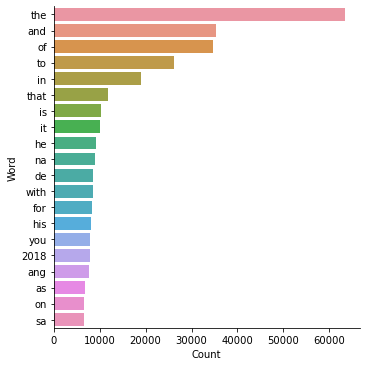

In [74]:
word_count = counts.max().nlargest(20).reset_index(name = "Count").rename(columns={'index': 'Word'})

word_count_plot = sns.catplot(y="Word", x="Count", orient="h", kind="bar", data=word_count)

maybe also show results without english stop words...

### Release Date

In [15]:
# code here

### Average Length of Song Lyrics

In [16]:
df

,Unnamed: 0,track_id,track_name,artist_name,genre_id,genre_names,lyrics
0,0,163709256,Ikaw At Ako,Moira Dela Torre feat. Jason Marvin,[14],['Pop'],Sabi nila\r\nBalang araw darating\r\nAng i'yon...
1,1,167116583,Hanggang Dito Na Lang,Jaya,[14],['Pop'],'Di ko alam kung tama ba ito\r\nLilisan ako up...
2,2,114473971,Ikaw,Yeng Constantino,[14],['Pop'],Sa pagpatak ng bawat oras ay ikaw\r\nAng iniis...
3,3,114797567,Chinito,Yeng Constantino,[14],['Pop'],Napapansin mo ba\r\nKaya ang tulad ko\r\nKahit...
4,4,170308366,"Ba'T Gano'N? (Theme From the Movie ""Family His...",Miguel Tanfelix feat. Mikoy Morales & Jemwell ...,"[34, 14]","['Music', 'Pop']",NaN
...,...,...,...,...,...,...,...
1195,1195,74789949,Bakit Kailangan Mag-Pray?,Musikatha Kids,['22'],['Christian & Gospel'],NaN
1196,1196,200856862,Tagpuan,Jay Tolentino,"['14', '22']","['Pop', 'Christian & Gospel']",NaN
1197,1197,79505192,Tayo's Sumamba,Tony Rodeo,['22'],['Christian & Gospel'],NaN
1198,1198,131978085,Biyayang Ganap,Faithmusic Manila,['22'],['Christian & Gospel'],NaN


In [17]:
## remove character occurrences ##
df_avg_l = df[['artist_name','genre_names', 'lyrics']].copy()
df_avg_l['genre_names'] = df_avg_l['genre_names'].str.replace('[', '')
df_avg_l['genre_names'] = df_avg_l['genre_names'].str.replace(']', '')
df_avg_l['genre_names'] = df_avg_l['genre_names'].str.replace(',', '')
df_avg_l

,artist_name,genre_names,lyrics
0,Moira Dela Torre feat. Jason Marvin,'Pop',Sabi nila\r\nBalang araw darating\r\nAng i'yon...
1,Jaya,'Pop','Di ko alam kung tama ba ito\r\nLilisan ako up...
2,Yeng Constantino,'Pop',Sa pagpatak ng bawat oras ay ikaw\r\nAng iniis...
3,Yeng Constantino,'Pop',Napapansin mo ba\r\nKaya ang tulad ko\r\nKahit...
4,Miguel Tanfelix feat. Mikoy Morales & Jemwell ...,'Music' 'Pop',NaN
...,...,...,...
1195,Musikatha Kids,'Christian & Gospel',NaN
1196,Jay Tolentino,'Pop' 'Christian & Gospel',NaN
1197,Tony Rodeo,'Christian & Gospel',NaN
1198,Faithmusic Manila,'Christian & Gospel',NaN


In [18]:
## create multiple rows based on genre_names ##
temp = df_avg_l['genre_names'].str.split("' '").apply(pd.Series, 1).stack()
temp.index = temp.index.droplevel(-1)
temp.name = 'genre_names'
temp

del df_avg_l['genre_names']
df_avg_l = df_avg_l.join(temp)

## remove occurence of "'" ##
df_avg_l['genre_names'] = df_avg_l['genre_names'].str.replace("'", '')

In [113]:
df_avg_l.head(30)

,artist_name,lyrics,genre_names,lyrics_count
0,Moira Dela Torre feat. Jason Marvin,Sabi nila\r\nBalang araw darating\r\nAng i'yon...,Pop,153.0
1,Jaya,'Di ko alam kung tama ba ito\r\nLilisan ako up...,Pop,164.0
2,Yeng Constantino,Sa pagpatak ng bawat oras ay ikaw\r\nAng iniis...,Pop,215.0
3,Yeng Constantino,Napapansin mo ba\r\nKaya ang tulad ko\r\nKahit...,Pop,214.0
4,Miguel Tanfelix feat. Mikoy Morales & Jemwell ...,NaN,Music,NaN
4,Miguel Tanfelix feat. Mikoy Morales & Jemwell ...,NaN,Pop,NaN
5,Ben&Ben,"Oh shit, I guess we're starting\r\nThe mic is ...",Pop,18224.0
6,Ben&Ben feat. Sam Concepcion,(Ben&Ben)\r\nKulang ang mga salitang sinabi\r\...,Pop,116.0
7,David Archuleta,Mayroon akong nais malaman\r\nMaaari bang magt...,Pop,168.0
8,Lea Salonga,NaN,Pop,NaN


In [263]:
df_avg_l['lyrics'][14]

"['\\n\\r\\nKay ganda ganda ng iyong mukha\\nParang anghel na sa langit ay bumaba\\n\\nNgunit ang pangit ng ugali mo\\nMukhang anghel ngunit ang asal mo\\nAng pangit ng ugali mo\\nMukhang anghel ngunit ang asal mo\\n\\nHindi ko maintindihan kung bakit ka ganyan\\nDati naman ika’y mabait\\nNgayo’y pakitang tao’t pagyayabang lang ang yong alam\\nPag may lumamang ikaw ay galet\\n\\nNakakagulat ang maamo mong mukha\\nMaliit na bagay lang ika’y nagwawala\\nAt ang iyong mga labi na kaakit-akit\\nBukang bibig ay mura’t walang patid na panlalait\\n\\nAng pangit ng ugali mo\\nMukhang anghel ngunit ang asal mo\\nAng pangit ng ugali mo\\nMukhang anghel ngunit ang asal mo\\n\\nBakit kaya bigla na lang ika’y nagbago\\nKagandahan mo’y isang balat-kayo\\nDi maikukubli ng tamis ng yong mga ngiti\\nAng tunay na kulay mo at itim ng yong budhi\\n\\nAng yong kawangis ay bulaklak na anong rikit\\nPunong-puno pala ng tinik\\nAko’y nabulag sa gayuma ng iyong anyo\\nNasa loob pala ang kulo\\n\\nDahil ang pang

In [277]:
#df_avg_l['lyrics_edit'] = df_avg_l['lyrics'].str.replace("\r\n", ' ')
#df_avg_l['lyrics_edit'] = df_avg_l['lyrics_edit'].str.replace("\'", '')

df_avg_l['lyrics_edit'] = df_avg_l['lyrics'].str.replace('\\', ' ')
df_avg_l['lyrics_edit'] = df_avg_l['lyrics_edit'].str.replace("\'", '')
df_avg_l['lyrics_edit'] = df_avg_l['lyrics_edit'].str.replace(" n ", ' ')
df_avg_l['lyrics_edit'] = df_avg_l['lyrics_edit'].str.replace(" r ", '')
df_avg_l['lyrics_edit'] = df_avg_l['lyrics_edit'].str.replace("\r\n\r\n", ' ')

df_avg_l['lyrics_edit'] = df_avg_l['lyrics_edit'].str.replace("\r\n", ' ')
df_avg_l['lyrics_edit'] = df_avg_l['lyrics_edit'].str.replace("\u2005", ' ')
df_avg_l['lyrics_edit'] = df_avg_l['lyrics_edit'].str.replace("CHORUS: ", '')
df_avg_l['lyrics_edit'] = df_avg_l['lyrics_edit'].str.replace("Verse 1 ", '')
df_avg_l['lyrics_edit'] = df_avg_l['lyrics_edit'].str.replace("CHORUS: ", '')
df_avg_l['lyrics_edit'] = df_avg_l['lyrics_edit'].str.replace('"n', '')
df_avg_l['lyrics_edit'] = df_avg_l['lyrics_edit'].str.replace(' n"', '')
df_avg_l['lyrics_edit'] = df_avg_l['lyrics_edit'].str.replace(' n]', '')

df_avg_l['lyrics_edit'][15]
#nattemp aq ibruteforce ung mga 'n' sa unahan ng word

'[Akoy isang ermitanyo nNagkukulong sa kweba ko nHindi ako mahilig maki-party nAng gusto ko ay sleeping party nWag mo akong ayaing lumabas nPagod ako, puyat at walang cash nIkaw na lang ang dumalaw dito nSa mahiwagang kweba ko nMas okay sa akin ang mapayapang kapaligiran nNakakabingi ang mundo na inyong ginagalawan nHalinat iwanan nang mga problemat kaguluhan nBigyang laya ang isip at subukan mong maglibang nSa aking kweba nSa aking kweba nSa aking kweba nSa aking kweba nDiba, yeahba, ahh nSa kweba ko ay merong beer nMay foodtrip din at chill na chill nMay DVD, PS3, Xbox, at Cable TV nMay Jollibee delivery nMag-aaya tayo ng chicks nTatambay lang at petiks petiks nMay soundtrip din at may gitara nMagja-jamming tayo hanggang umaga nMas okay sa akin ang mapayapang kapaligiran nNakakabingi ang mundo na inyong ginagalawan nHalinat iwanan nang mga problemat kaguluhan nBigyang laya ang isip at subukan mong maglibang nSa aking kweba nSa aking kweba nSa aking kweba nSa aking kweba nDiba, yeahba

In [278]:
str = df_avg_l['lyrics_edit'][15]
spacing = str.count(" ")
print(spacing+1)

163


In [279]:
def count_ly(string):
    str = string
    spacing = str.count(" ")
    #print(spacing+1)
    return spacing+1

arr = []
for index in df_avg_l['lyrics_edit']:
    if isinstance(index, float)==False:
        put = count_ly(index)
        print(put)
        arr.append(put)
    else:
        arr.append(NaN)
   # print(num)
print(arr)

df_avg_l['lyrics_count'] = arr

153
164
215
214
18224
116
168
79
68
166
290
137
198
163
170
229
170
170
120
118
118
205
154
121
519
519
519
166
110
133
77
215
163
147
294
174
207
14264
14264
14264
14264
303
187
164
179
179
179
603
147
184
184
142
221
239
239
142
181
153
153
100
100
241
153
160
83
483
191
295
109
249
249
216
111
693
117
117
117
171
206
89
89
467
171
151
189
332
182
99
218
134
163
153
315
261
195
175
187
151
143
188
2981
2981
110
106
220
136
204
104
123
165
171
84
24195
191
159
153
100
165
174
147
142
128
204
69
140
129
147
147
161
176
176
165
159
81
184
253
155
155
159
142
264
173
204
198
154
110
159
174
176
317
148
212
140
108
202
137
192
270
165
165
451
266
119
91
69
92
354
149
206
149
105
159
162
212
189
177
307
144
164
164
12567
12567
173
205
123
195
229
85
182
286
136
136
158
298
129
163
129
227
137
245
123
7671
97
141
180
305
580
649
649
275
245
74
562
305
603
380
380
218
370
370
253
444
162
420
396
396
388
388
2837
507
187
405
9303
247
496
28607
858
98442
141
527
532
391
204
174
826
460
314
273

In [280]:
df_avg_l.head(30)

,artist_name,lyrics,genre_names,lyrics_count,lyrics_edit
0,Moira Dela Torre feat. Jason Marvin,Sabi nila\r\nBalang araw darating\r\nAng i'yon...,Pop,153.0,Sabi nila Balang araw darating Ang iyong tangi...
1,Jaya,'Di ko alam kung tama ba ito\r\nLilisan ako up...,Pop,164.0,Di ko alam kung tama ba ito Lilisan ako upang ...
2,Yeng Constantino,Sa pagpatak ng bawat oras ay ikaw\r\nAng iniis...,Pop,215.0,Sa pagpatak ng bawat oras ay ikaw Ang iniisip ...
3,Yeng Constantino,Napapansin mo ba\r\nKaya ang tulad ko\r\nKahit...,Pop,214.0,Napapansin mo ba Kaya ang tulad ko Kahit nasa ...
4,Miguel Tanfelix feat. Mikoy Morales & Jemwell ...,NaN,Music,NaN,NaN
4,Miguel Tanfelix feat. Mikoy Morales & Jemwell ...,NaN,Pop,NaN,NaN
5,Ben&Ben,"Oh shit, I guess we're starting\r\nThe mic is ...",Pop,18224.0,"Oh shit, I guess were starting The mic is wher..."
6,Ben&Ben feat. Sam Concepcion,(Ben&Ben)\r\nKulang ang mga salitang sinabi\r\...,Pop,116.0,(Ben&Ben) Kulang ang mga salitang sinabi Nang ...
7,David Archuleta,Mayroon akong nais malaman\r\nMaaari bang magt...,Pop,168.0,Mayroon akong nais malaman Maaari bang magtano...
8,Lea Salonga,NaN,Pop,NaN,NaN


In [281]:
df_avg_l['genre_names'].unique()

array(['Pop', 'Music', 'World', 'Asia', 'Alternative', 'Pop/Rock',
       'Original Pilipino Music', 'Jazz', 'Pinoy Pop',
       'Singer/Songwriter', 'Holiday', 'Christmas', 'Karaoke', 'R&B/Soul',
       'Hip Hop/Rap', 'Afro-Pop', '', 'Ambient', 'Funk', 'Old School Rap',
       'Contemporary R&B', 'Rap', 'Hip-Hop', 'Rock', 'Punk',
       'Heavy Metal', 'Psychedelic', 'Indie Rock', 'Christian & Gospel',
       'Gospel', 'Christian & Gospel "Childrens Music"',
       'Praise & Worship'], dtype=object)

In [282]:
df_avg_l.groupby('genre_names')['lyrics_count'].mean()

genre_names
                                          384.500000
Afro-Pop                                         NaN
Alternative                              1437.670051
Ambient                                          NaN
Asia                                    14264.000000
Christian & Gospel                       2766.285714
Christian & Gospel "Childrens Music"      748.000000
Christmas                                        NaN
Contemporary R&B                          273.000000
Funk                                             NaN
Gospel                                           NaN
Heavy Metal                               798.500000
Hip Hop/Rap                              2111.094972
Hip-Hop                                          NaN
Holiday                                          NaN
Indie Rock                                149.000000
Jazz                                    20144.500000
Karaoke                                   136.000000
Music                             

### Average Length of Song Lyrics x Genres

In [11]:
# code here

### Average Length of Song Lyrcis x Artists

In [12]:
# code here

### Genres per year

In [13]:
# code here

### Length of song per year

In [ ]:
# code here